<a href="https://colab.research.google.com/github/Suyash018/AI_Course_VIT/blob/main/da1q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [ ]:
data = load_breast_cancer()


In [ ]:
list(data)
print(data.target_names)
print(data.feature_names)


['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
X = data.data

In [ ]:
y = data.target
print(X.shape)

(569, 30)


In [ ]:
print(X[:80])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.805e+01 1.615e+01 1.202e+02 ... 2.102e-01 3.751e-01 1.108e-01]
 [2.018e+01 2.397e+01 1.437e+02 ... 2.508e-01 5.440e-01 9.964e-02]
 [1.286e+01 1.800e+01 8.319e+01 ... 7.926e-02 2.779e-01 7.918e-02]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred =  clf.predict(X_test)

In [ ]:
print(y_pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))*100)
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred)*100)


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy Score on train data:  100.0
Accuracy Score on test data:  94.73684210526315
[[40  3]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
clf.fit(X_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))*100)
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))*100)


Accuracy Score on train data:  92.96703296703296
Accuracy Score on the test data:  90.35087719298247


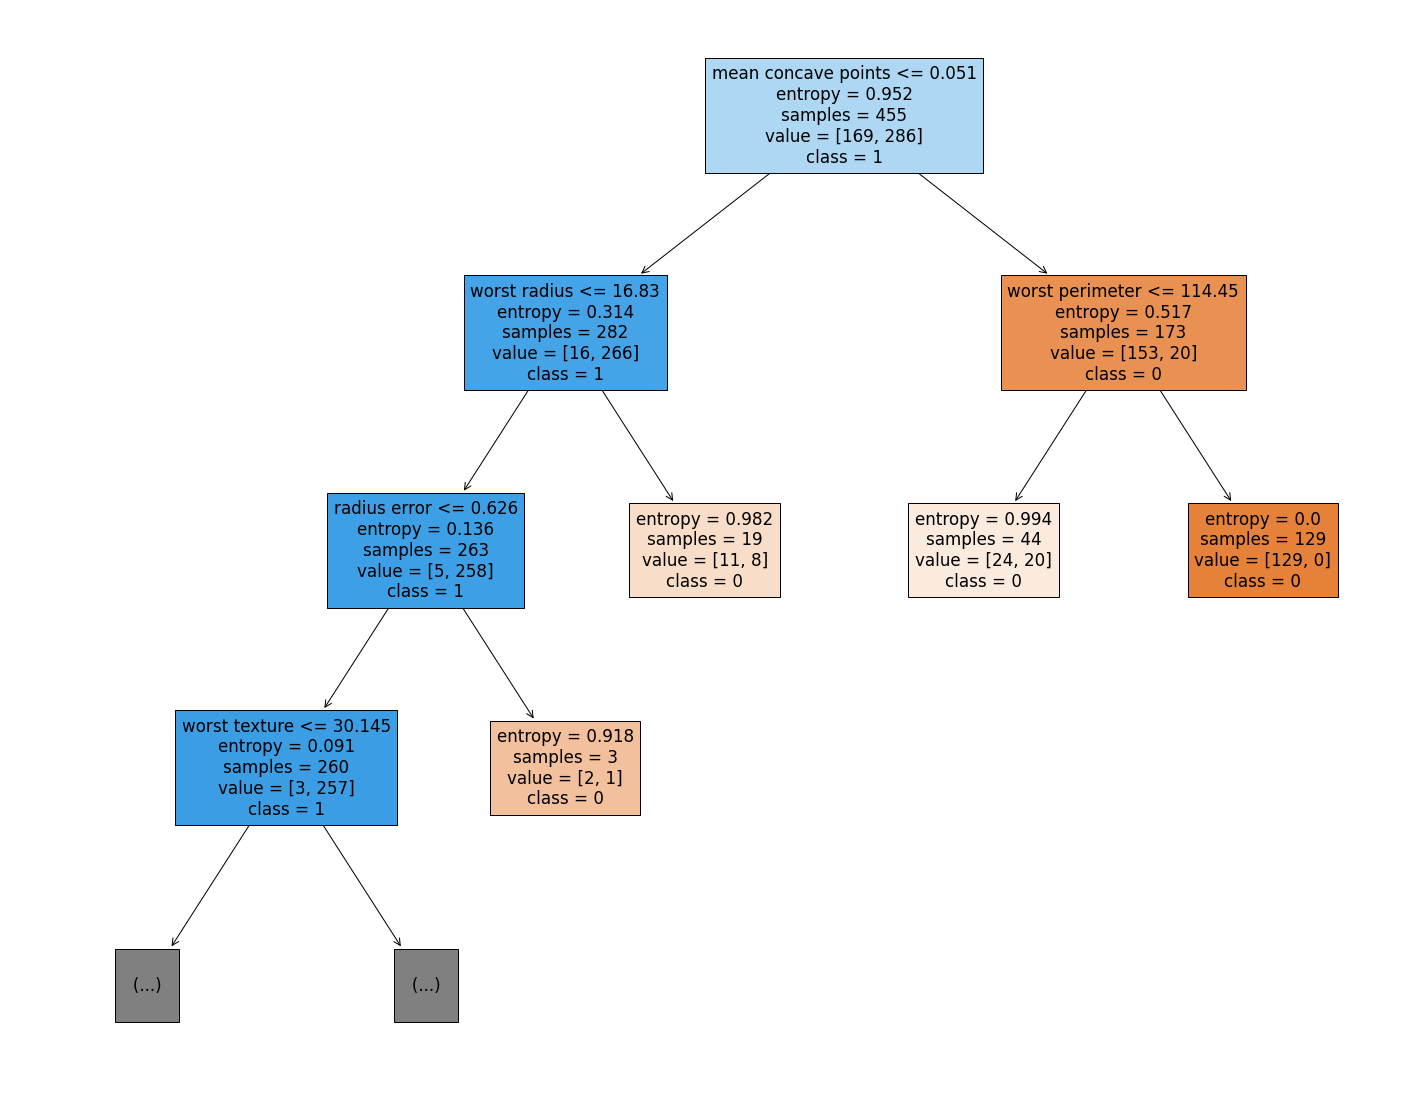

In [ ]:
from sklearn import tree 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20)) 
_ = tree.plot_tree(clf, max_depth=3, feature_names=data.feature_names[:-1], class_names=['0','1'], filled=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 10, 100, 1000]
}

clf = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    cv=10,  
    n_jobs=-1)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 100, 1000],
                         'splitter': ['best', 'random']})

In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003432,0.000768,0.000844,0.000164,gini,1,best,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.913043,0.847826,...,0.891304,0.847826,0.933333,0.866667,0.844444,0.888889,0.911111,0.885749,0.030634,13
1,0.001428,0.000143,0.000647,0.000069,gini,1,random,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.934783,0.891304,...,0.934783,0.847826,0.888889,0.777778,0.800000,0.844444,0.777778,0.858889,0.056105,16
2,0.010370,0.002167,0.000810,0.000040,gini,10,best,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.956522,0.869565,...,0.913043,0.891304,0.955556,0.911111,0.822222,0.933333,0.933333,0.916425,0.043903,10
3,0.002705,0.002015,0.000656,0.000098,gini,10,random,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.978261,0.956522,...,0.913043,0.934783,0.955556,0.844444,0.866667,0.911111,0.933333,0.922850,0.038995,7
4,0.010079,0.002477,0.001003,0.000363,gini,100,best,"{'criterion': 'gini', 'max_depth': 100, 'split...",0.934783,0.869565,...,0.913043,0.934783,0.977778,0.911111,0.822222,0.955556,0.933333,0.920870,0.043330,8


In [ ]:
cv_results = cv_results[['mean_test_score', 'param_criterion', 'param_splitter', 'param_max_depth']]
cv_results.sort_values(by='mean_test_score', ascending=False)

,mean_test_score,param_criterion,param_splitter,param_max_depth
13,0.945072,entropy,random,100
7,0.942899,gini,random,1000
10,0.927391,entropy,best,10
12,0.927343,entropy,best,100
14,0.927343,entropy,best,1000
5,0.927295,gini,random,100
3,0.922850,gini,random,10
4,0.920870,gini,best,100
6,0.920870,gini,best,1000
2,0.916425,gini,best,10


In [ ]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 100, 'splitter': 'random'}